**1. Подключаем библиотеки**

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as sk
import skimage


**2.Получаем доступ к данным** Т.к. изображения рисинок уже рассортированы по папкам с названиями видов, то отсюда информацию о названиях видов и возьмём

In [4]:
Path = '/home/art/Project/Project1/Rice_Image_Dataset'
Species=os.listdir(Path)
del(Species[1])#игнорируем текстовый файл, он чисто описательный
print("Виды турецкого риса: " + ', '.join(Species))

Виды турецкого риса: Basmati, Jasmine, Ipsala, Karacadag, Arborio


**3.Загружем данные** С целью ускорения процесса, масштабируем изображения и делаем их полностью серыми (уходим от RGB-формата). Для работы нейросети производим спрямление массивов

In [5]:
rescale = skimage.transform.rescale
imread = skimage.io.imread
Data = {'Image':[0]*75000, 'Species':[0]*75000}
n = 0
for categoty in Species:
    m=0
    for string in os.listdir(Path+'/'+categoty):
        image = rescale(imread(Path+'/'+categoty+'/'+string), 0.125, anti_aliasing=False)
        Data['Image'][n]=list(image.reshape(image.shape[0]**2))
        Data['Species'][n]=categoty
        n+=1
        if m==0:
            print("Работаем с "+categoty)
        m+=1
print("Конец загрузки изображений")
Data = pd.DataFrame(Data).sample(frac=1)

Работаем с Basmati
Работаем с Jasmine
Работаем с Ipsala
Работаем с Karacadag
Работаем с Arborio
Конец загрузки изображений


In [6]:
Data

,Image,Species
27331,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Jasmine
66431,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
58189,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Karacadag
52502,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Karacadag
71957,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
...,...,...
71281,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio
17719,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Jasmine
43110,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ipsala
74709,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Arborio


Демонстрируем возможностб частично восстановить изображение
Также проводим разбиени данных на обучающую и тестовую выборку

Рисинка


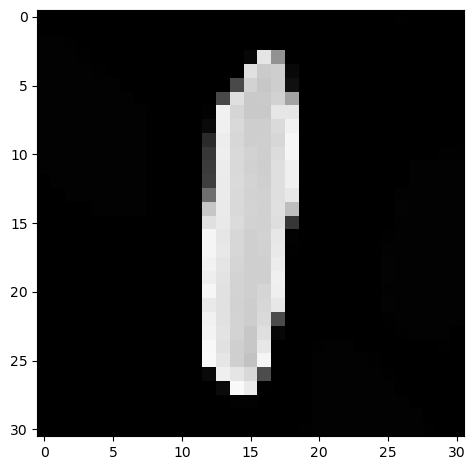

In [7]:
from sklearn.model_selection import train_test_split
f=np.array(Data['Image'][0])
skimage.io.imshow(f.reshape((round(np.sqrt(f.shape[0])),round(np.sqrt(f.shape[0])),1)))
print('Рисинка')
X_train, X_test, y_train, y_test = train_test_split(Data['Image'],Data['Species'],random_state=0,train_size = 20000)

Подключаем нейросеть, используем метод близжайшего соседа
Преобразуем данные в формат, с которым классификатор согласен работать

In [8]:
print(X_train)
print(y_train)

46823    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1990     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
69306    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15077    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
33954    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
68040    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34963    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
33872    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
28881    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70431    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Image, Length: 20000, dtype: object
46823    Karacadag
1990       Basmati
69306      Arborio
15077      Jasmine
33954       Ipsala
           ...    
68040      Arborio
34963       Ipsala
33872       Ipsala
28881      Jasmine
70431      Arborio
Name: Species, Length: 20000, dtype: object


In [9]:
from sklearn.neural_network import MLPClassifier
cnn = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300, 12), random_state=1)
X_train_1,y_train_1=np.array(list(X_train)),list(y_train)
cnn.fit(X_train_1,y_train_1)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(300, 12), random_state=1)

Проверяем работоспособность нашей модели

Доля правильных ответов -  97.4509090909091 %


[Text(0, 1, 'Basmati'),
 Text(1, 1, 'Jasmine'),
 Text(2, 1, 'Ipsala'),
 Text(3, 1, 'Karacadag'),
 Text(4, 1, 'Arborio')]

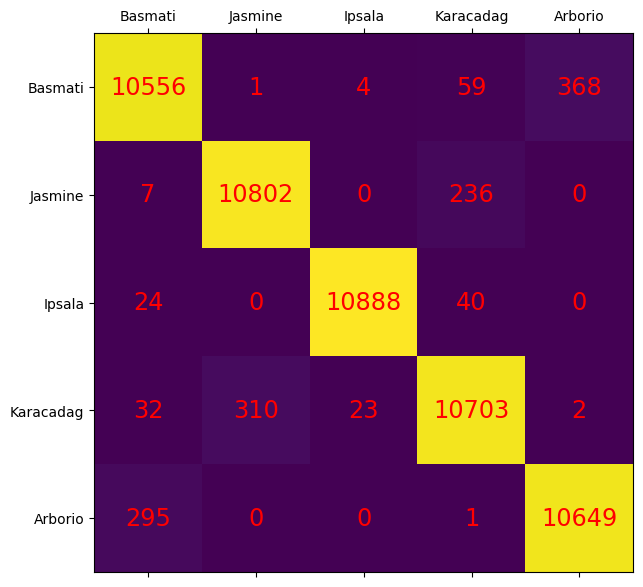

In [10]:
X_test_1 = np.array(list(X_test))
Prediction = cnn.predict(X_test_1)

from sklearn.metrics import accuracy_score

print('Доля правильных ответов - ',100*accuracy_score(y_test, Prediction),'%')
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, Prediction)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.matshow(mat)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large', c = 'r')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(Species)
ax.set_xticklabels(Species)